Zdroj: https://youtube.com/watch?v=Kln0ZQ7sX8k&listen=false\
Pokud nejsem schopen zjistit Hessián, mohu jej aproximovat Gauss-Newtonovou metodou.

$ y = f(x; \beta) + \epsilon $\
$x$... nezávislá proměnná\
$\beta$... koeficient\
$\epsilon$... šum

Předpokládám, že funkce je nelineárně závislá na $\beta$.

Reziduum $r_i = y_i - f(x_i; \beta)$\
minimalizuji $SSRE = \sum{{r_i}^2}$

Ve funkci jedné proměnné minimum derivace najdu Newtonovou metodou:\
$x_{t+1} = x_{t}  + \frac{f'(x_t)}{f''(x_t)}$

Obdoba pro funkci více proměnných:\
$x_{t+1} = x_{t}  + {H_x}^{-1}\nabla_xf$


Derivace funkce SSRE při zvoleném koeficientu $\beta_j$ (j je iterace):
Pro gradient jsme použili řetězové pravidlo.

$\nabla_{\beta_j}({SSRE)} = \sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}}= \sum{-2(r_i·\frac{\partial{f_i}}{\partial{\beta_j}})}$


Proč je tam to $2r_i$? Protože funkce SSRE je $SSRE = \sum{{r_i}^2}$ a její derivace je $\sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}} $\
Zároveň $r_i = y_i - f(x_i; \beta)$, $\sum{2r_i·\frac{\partial{r_i}}{\partial{\beta_j}}} = \sum{2r_i·\frac{\partial{y_i - f(x_i; \beta)}}{\partial{\beta_j}}} = \sum{2r_i·\frac{{0 - \partial f(x_i; \beta)}}{\partial{\beta_j}}} = \sum{-2(r_i·\frac{\partial{f_i}}{\partial{\beta_j}})}$ (parciální derivace $y_i$ vůči $beta_j$ je 0)

\
\
Generalizace (derivace SSRE vůči všem koeficientům - gradient):

$\nabla({SSRE)}  = -2·J^T·\vec{r}$

J je Jakobián, předpokládáme, že máme až p koeficientů (sloupců) a n měření/bodů (řádků).\
<img src="./picture_gaussNewton1.PNG" alt="Jakobián"  width="300"  height="150">

Pro druhou derivaci dle j a dle k použijeme součinové pravidlo derivací. V okamžiku, kdy se poprvé objevila ve vztahu aproximace se z toho stala Gauss-Newtonova metoda.

$\nabla_{\beta_j beta_k}(SSRE) = -2 \sum (-\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}+ r_i·\frac{\partial^2{f_i}}{\partial{\beta_j} \partial{\beta_k}}) \approx 2 \sum {\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}} $

\
\
S použitím dané aproximace Hessiánu Gauss-Newtonovou metodou můžeme použít kompaktní tvar
$\nabla_{\beta_j beta_k}(SSRE) \approx 2 \sum {\frac{\partial{f_i}}{\partial{\beta_k}}·\frac{\partial{f_i}}{\partial{\beta_j}}} = 2·J^T·J$\
($J^T·J$ je velikost vektoru jakobiánu)

\
\
\
Newtonova metoda více proměnných:

$\beta_{t+1} = \beta{t} - ((\nabla_\beta)^2(SSRE))^{-1}\nabla_\beta(SSRE) = \beta{t} - H^{-1}\nabla_\beta(SSRE)$

\
\
Gauss-Newtonova metoda více proměnných:
$\beta_{t+1} = \beta{t} - ((\nabla_\beta)^2(SSRE))^{-1}\nabla_\beta(SSRE) = \approx \beta{t} - (2·{J_t}^T·{J_t})^{-1} (-2·{J_t}^T·r_t) = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$

\
\
\
\
\
\
Jak tedy udělat tu aproximaci funkce jako takovou?



Aproximace funkce:\
$f(x; \beta) \approx f(x; \beta_t) + \nabla_\beta f(x; \beta_t)[\beta-\beta_t]$

Aproximace reziduí:\
$r_i = y_i - f(x; \beta) \approx y_i - f(x; \beta_t) - \nabla_\beta f(x; \beta_t)[\beta-\beta_t]$

Zavedeme si pracovní veličiny (s vlnkou, ty jsou počítány průběžně iteračně):\
$ \tilde{y_i} =  y_i - f(x; \beta_t)$\
$ \tilde{x_i} = \nabla_\beta f(x; \beta_t) $\
$ \tilde{\beta} = \beta-\beta_t $


Po zavedení pracovních veličin získáváme pro aproximaci rezidua kompaktní LINEÁRNÍ vztah \
$r_i \approx \tilde{y_i} - {\tilde{x_i}}^T\tilde{\beta}$

Známe čísla $y_i$, $x_i$, $\beta$ se snažíme najít.
\
\
\
Budeme tedy minimalizovat bety ve vztahu:\
$\tilde{y} - \tilde{X}·{\beta}$\
kde $\tilde{X}$ je jakobiánem naší funkcí $J_f$
\
\
\
Řešením pro pracovní koeficienty $\tilde{\beta}$ je tedy vztah:
$\tilde{\vec{\beta}} = ({J_t}^T·J_t)^{-1}{J_t}^T·\tilde{\vec{y}} = ({J_t}^T·J_t)^{-1}{J_t}^Tr_t$
\
Proč je tam teď jen to $r_t$? Viz $r_i = y_i - f(x_i; \beta)$ a derivace y_i dle koeficientu je 0.

Pokud zpětně rozbouráme $\tilde{\beta}$:
$\nabla_\beta f(x; \beta_t) = ({J_t}^T·J_t)^{-1}{J_t}^Tr_t$

Přeskládáním rovnice:
$\beta_{t+1} = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$
\
\
\
\
\



In [227]:
import numpy as np
import numpy.typing as npt
import typing
import scipy.linalg as spLinalg
import scipy.optimize as spOptimize
import matplotlib.pyplot as plt
import sympy as sp

Vyzkoušejme si 1D případ pro funkci níže:
$y = \frac {2x}{3+x}$

In [228]:
def functionChaos(a: float, b: float, x:npt.NDArray[np.float32], chaosMag: typing.Optional[float] = 0.2) -> npt.NDArray[np.float32]:
    # funkce s bordýlkem
    result =  (a*x)/(b+x)
    return result + np.random.normal(-chaosMag, chaosMag, len(result))

def functionPure(a: float, b: float, x:npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    # funkce bez bordýlku
    return (a*x)/(b+x)


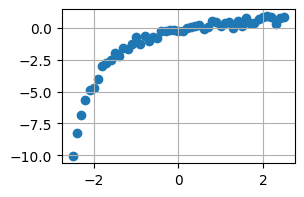

In [229]:
a: float = 2.0
b: float = 3.0
x: npt.NDArray[np.float32] = np.linspace(-2.5, 2.5, 51)
y: npt.NDArray[np.float32] = functionChaos(a=a, b=b, x=x)
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.grid()
fig.set_size_inches(3,2)

Teď numericky vyřešíme Jakobián\
<img src="./picture_gaussNewton1.PNG" alt="Jakobián"  width="300"  height="150">

In [230]:
def Jacobian(fInput: typing.Callable[[float, float, npt.NDArray[np.float32]], npt.NDArray[np.float32]],
             a: float,
             b: float,
             x: npt.NDArray[np.float32]) -> npt.NDArray[np.float32]:
    delta: float = 1e-6
    dfda: npt.NDArray[np.float32] = (fInput(a + delta, b, x) - fInput(a - delta, b, x))/(2*delta)
    dfdb: npt.NDArray[np.float32] = (fInput(a, b + delta, x) - fInput(a, b - delta, x))/(2*delta)
    return np.column_stack([dfda, dfdb])


$\beta_{t+1} = \beta_{t} + ({J_t}^T·{J_t})^{-1} {J_t}^T·r_t$

In [231]:
def gaussNewton(
    fInput: typing.Callable[[float, float, npt.NDArray[np.float32]], npt.NDArray[np.float32]],
    x: npt.NDArray[np.float32],
    y: npt.NDArray[np.float32],
    a0: float,
    b0: float,
    tolerance: typing.Optional[float] = 1e-6,
    maxIter: typing.Optional[int] = 100
):
    old:npt.NDArray[np.float32] = np.array([a0,b0])
    new:npt.NDArray[np.float32] = np.array([a0,b0])
    iteration: int = 0
    
    #reziduál celkový budu řešit jako vektor
    while (iteration < maxIter) and (np.linalg.norm(old-new) < tolerance):
        old:npt.NDArray[np.float32] = new.copy()
        
        J       = Jacobian(fInput, a= old[0], b= old[1], x = x)
        yTilde  = y - fInput(a=old[0], b= old[1], x = x)
        #new     = old + ((J.T@J).I)@J.T@yTilde nemohu použít, protože je to array, nikoliv matice, potřebuji dostat obdobnou funkci bez zkratky
        new     = old + np.linalg.inv(J.T@J)@J.T@yTilde
        
        iteration += 1
    return new

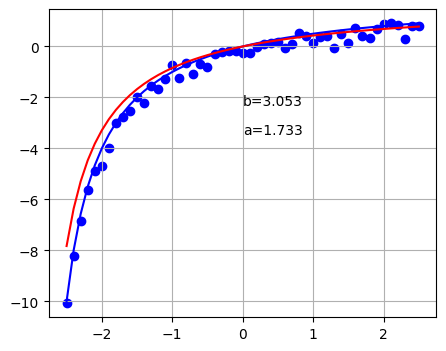

In [232]:
chaosPercentage: float = 0.25
a0 = np.random.uniform(low=(1.0-chaosPercentage)*a, high=(1.0+chaosPercentage)*a)
b0 = np.random.uniform(low=(1.0-chaosPercentage)*b, high=(1.0+chaosPercentage)*b)
aNew, bNew = gaussNewton(
    fInput= functionPure,
    x= x,
    y= y,
    a0 = a0,
    b0 = b0,
    tolerance=1e-12,
    maxIter=10000
)


fig,ax = plt.subplots()
ax.scatter(x,y, color="blue")
ax.plot(
    x,
    functionPure(a=a, b=b, x=x),
    color="blue"
)

ax.plot(
    x,
    functionPure(a=a0, b=b0, x=x),
    color="red"
)
xAvg: float = 0.5*(min(x)+max(x))
yAvg: float = 0.5*(min(y)+max(y))
ax.text(x=xAvg, y=yAvg*0.75,s=f"a={a0:.3F}")
ax.text(x=xAvg, y=yAvg*0.50,s=f"b={b0:.3F}")
ax.grid()

fig.set_size_inches(5,4)